## Bayes theorem

$$
\begin{align*}
P(y|x) &= \frac{P(x|y) \cdot P(y)}{P(x)}
\end{align*}
$$

## Naive Bayes formula

$$
\begin{align*}
P(y|\mathbf{x}) &\propto P(\mathbf{x}|y) \cdot P(y) \\
&\propto P(x_1|y) \cdot P(x_2|y) \cdots P(x_n|y) \cdot P(y) \\
&\propto \log(P(x_1|y)) + \log(P(x_2|y)) + \cdots + \log(P(x_n|y)) + \log(P(y)) \\
&\propto \sum_{i=1}^{n} \log(P(x_i|y)) + \log(P(y))
\end{align*}
$$

## Gaussian conditional probability
$$
\begin{align*}
P(x_i|y) = \frac{1}{\sqrt{2 \pi \sigma_y^2}} \exp \left(- \frac{(x_i - \mu_y)^2}{2 \sigma_y^2} \right)
\end{align*}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NaiveBayes:
    """
    Naive Bayes classification algorithm implemented using Gaussian conditional probability.
    """

    def fit(self, X: np.ndarray, y: np.ndarray) -> None:
        """
        Fit the Naive Bayes model.

        Parameters
        ----------
        X : numpy.ndarray
            Training data of shape (n_samples, n_features).

        y : numpy.ndarray
            Target values of shape (n_samples,).

        Returns
        -------
        None
        """

        # Get the number of features
        n_features = X.shape[1]

        # Get unique classes (labels)
        self.classes = np.unique(y)
        # Store the number of classes (labels)
        n_classes = len(self.classes)

        # Initialize array of zeroes for class means
        self.means = np.zeros((n_classes, n_features))
        # Initialize array of zeroes for class variances
        self.vars = np.zeros((n_classes, n_features))
        # Initialize vector of zeroes for class priors
        self.class_priors = np.zeros(n_classes)

        for idx, c in enumerate(self.classes):
            # Select samples belonging to class c
            X_c = X[y == c]
            # Store the mean for the current class
            self.means[idx] = X_c.mean(axis=0)
            # Store the variance for the current class
            self.vars[idx] = X_c.var(axis=0)
            # Store the prior for the current class
            self.class_priors[idx] = len(X_c) / len(X)

    def _gaussian(self, x: np.ndarray, mean: np.ndarray, var: np.ndarray) -> float:
        """
        Gaussian conditional probability function.

        Parameters
        ----------
        x : np.ndarray
            Sample of shape (n_features,).

        mean : np.ndarray
            Class mean of shape (n_features,).

        var : np.ndarray
            Class variance of shape (n_features,). 

        Returns
        -------
        probability : float
        """
        return (1 / np.sqrt(2 * np.pi * var)) * np.exp(-1 * ((x - mean)**2 / (2 * var)))
    
    def _predict(self, x) -> int:
        """
        Helper method for predicting the class of a single sample.

        Parameters
        ----------
        x : np.ndarray
            Sample of shape (n_features,).

        Returns
        -------
        predicted_class : int 
        """

        # Initialize empty list for predictions
        predictions = []

        for i in range(len(self.classes)):
            # Calculate logarithm of class prior
            prior = np.log(self.class_priors[i])
            # Calculate the sum of logarithms of gaussian conditional probabilities
            conditional = np.sum(np.log(self._gaussian(x, self.means[i], self.vars[i])))
            # Prediction is the sum of prior and conditional probabilities
            prediction = prior + conditional
            predictions.append(prediction)

        predictions = np.array(predictions)
        # Get the index of the class with highest probability
        best_index = np.argmax(predictions)
        return self.classes[best_index]

    def predict(self, X: np.ndarray) -> np.ndarray:
        """
        Predict using the Naive Bayes model.

        Parameters
        ----------
        X : numpy.ndarray
            Samples of shape (n_samples, n_features).

        Returns
        -------
        y : numpy.ndarray
            Predicted values of shape (n_samples,).
        """
        predictions = [self._predict(x) for x in X]
        return np.array(predictions) 

In [3]:
def plot_2d_clf_problem(X, y, h=None):
    '''
    Plots a two-dimensional labeled dataset (X,y) and, if function h(x) is given, 
    the decision surfaces.
    '''
    assert X.shape[1] == 2, "Dataset is not two-dimensional"
    if h!=None : 
        # Create a mesh to plot in
        r = 0.03  # mesh resolution
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, r),
                             np.arange(y_min, y_max, r))
        XX=np.c_[xx.ravel(), yy.ravel()]
        try:
            Z_test = h(XX)
            if Z_test.shape == ():
                # h returns a scalar when applied to a matrix; map explicitly
                Z = np.array(list(map(h,XX)))
            else :
                Z = Z_test
        except ValueError:
            # can't apply to a matrix; map explicitly
            Z = np.array(list(map(h,XX)))
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)

    # Plot the dataset
    plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.tab20b, marker='o', s=50);

Accuracy: 1.0


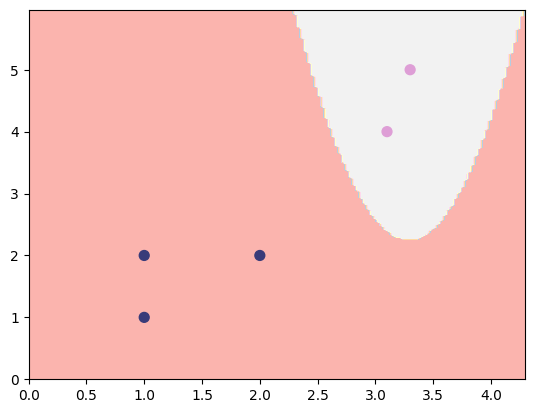

In [5]:
X = np.array([[1, 1],
              [1, 2],
              [2, 2],
              [3.3, 5],
              [3.1, 4]])

y = np.array([[0], [0], [0], [1], [1]])

model = NaiveBayes()
model.fit(X, y.reshape(-1))
y_pred = model.predict(X)
print(f'Accuracy: {np.mean(y_pred == y.reshape(-1))}')
plot_2d_clf_problem(X, y, model.predict)

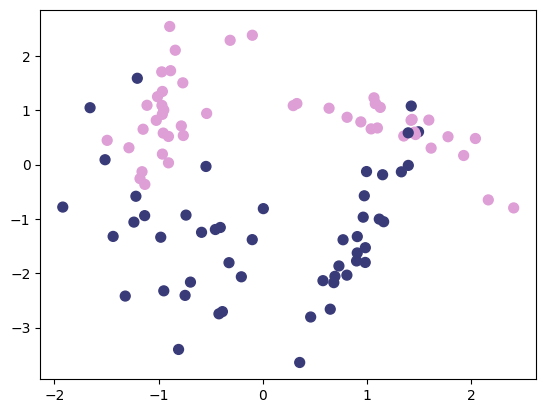

In [11]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_classes=2, n_redundant=0, n_features=2, n_informative=2)
plot_2d_clf_problem(X, y)

Accuracy: 0.86


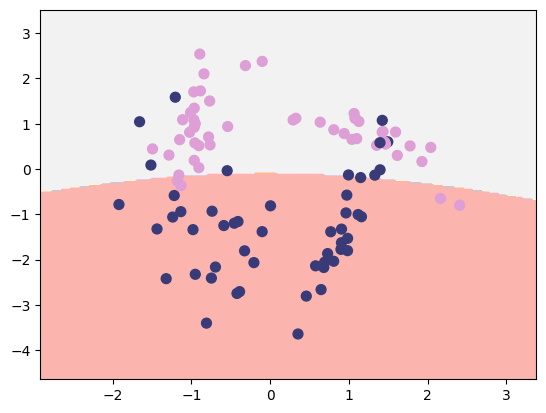

In [12]:
model.fit(X, y)
y_pred = model.predict(X)
print(f'Accuracy: {np.mean(y_pred == y)}')
plot_2d_clf_problem(X, y, model.predict)